<a href="https://colab.research.google.com/github/BessieXuOrange/Data-Analysis/blob/main/Human_capital_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data preprocessing and cleaning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set(style="whitegrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving human capital data 2025.xlsx to human capital data 2025.xlsx


In [ ]:
import io
# Load the entire Excel file
df_hc = 'roster_01222025_new.xlsx'

# Load the Excel file to access multiple sheets
excel_data = pd.ExcelFile(df_hc)

# Read specific sheets by their names
human_capital = excel_data.parse(sheet_name='Abhishek_Work')

In [ ]:
print(human_capital.head())

        Full Name            Exit Date  \
0      Aahna Garg  2023-01-14 00:00:00   
1   Aakash Shukla  2024-09-25 00:00:00   
2  Aakriti Saxena                  NaN   
3     Aamir Memon                  NaN   
4     Aanya Tyagi                  NaN   

                                   Opportunity Title       Role Specialty*  \
0                           UI/UX Designer or Artist      Other      Other   
1                                              Other  Developer      Other   
2                                              Other      Other      Other   
3  Experienced Salesforce Architect/Developer/Des...      Other      Other   
4                                          SAT Tutor      Other      Other   

  Program* Program**  Clockify Time ALL TIME 2024 Program Manager  \
0    Other     Other                          NaN             NaN   
1    Other     Other                          NaN             NaN   
2    Other     Other                          NaN             NaN   
3 

In [ ]:
print(human_capital.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Full Name                                 3232 non-null   object 
 1   Exit Date                                 835 non-null    object 
 2   Opportunity Title                         3232 non-null   object 
 3   Role                                      3232 non-null   object 
 4   Specialty*                                3232 non-null   object 
 5   Program*                                  3232 non-null   object 
 6   Program**                                 3232 non-null   object 
 7   Clockify Time ALL TIME 2024               464 non-null    float64
 8   Program Manager                           395 non-null    object 
 9   Start Date - Slack Account created (UTC)  855 non-null    object 
 10  ZIP                                 

In [ ]:
# drop some columns
columns_to_drop = [
    'Specialty2',
    'Program2',
    'Program Manager',
    '6 month duration.1'
]

columns_present = [col for col in columns_to_drop if col in human_capital.columns]

#drop these columns
human_capital = human_capital.drop(columns=columns_present)
print(human_capital.columns.tolist())

['Name', 'Account type', 'Account created (UTC)', 'Days active on Slack ', 'Messages posted', 'Completed Hours in 2024 - Clockify', 'Role', 'Specialty1', 'Program1', 'Time available', 'How soon to be stated?', 'volunteer duration', '6 month duration', '12 months duration']


In [ ]:
# organize columns name
human_capital.columns = human_capital.columns.str.lower().str.strip()
print(human_capital.columns.tolist())

['name', 'account type', 'account created (utc)', 'days active on slack', 'messages posted', 'completed hours in 2024 - clockify', 'role', 'specialty1', 'program1', 'time available', 'how soon to be stated?', 'volunteer duration', '6 month duration', '12 months duration']


In [ ]:
# check data frame
human_capital['account created (utc)'] = pd.to_datetime(
    human_capital['account created (utc)'],
    errors='coerce',
    infer_datetime_format=True
)

print("\nData types after conversion:")
print(human_capital['account created (utc)'].head())


Data types after conversion:
0   2024-09-13
1   2023-09-20
2   2024-09-18
3   2024-08-28
4   2024-10-21
Name: account created (utc), dtype: datetime64[ns]


<ipython-input-8-4deae1498adc>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  human_capital['account created (utc)'] = pd.to_datetime(


In [ ]:
# check the unsuccessful converted data
num_nat = human_capital['account created (utc)'].isna().sum()
print(f"\nNumber of NaT values: {num_nat}")


Number of NaT values: 133


In [ ]:
# change ohter ways
if num_nat > 0:
  print("\nOther ways to transfer")
  human_capital.loc[
      human_capital['account created (utc)'].isna(),
        'account created (utc)'
    ] = pd.to_datetime(
        human_capital.loc[human_capital['account created (utc)'].isna(), 'account created (utc)'],
        errors='coerce',
        format='%b %d, %Y'  # base on the real date to convert
    )

  # check the converted data
  num_nat_after = human_capital['account created (utc)'].isna().sum()
  print(f"\nNumber of NaT values after conversion: {num_nat_after}")

  # if there is date data couldn't be converted, delete these rows
  if num_nat_after > 0:
    print("\ndelete those couldn't be converted:'account created (utc)'")
    human_capital = human_capital.dropna(subset=['account created (utc)'])
    print(f"after deletion data shape：{human_capital.shape}")


Other ways to transfer

Number of NaT values after conversion: 133

delete those couldn't be converted:'account created (utc)'
after deletion data shape：(575, 14)


In [ ]:
# 填充分类变量缺失值
categorical_columns = [
    'account type',
    'role',
    'specialty1',
    'program1',
    'time available',
    'volunteer duration',
    '6 month duration',
    '12 months duration'
]

for col in categorical_columns:
    if col in human_capital.columns:
        human_capital[col] = human_capital[col].fillna('Unknown')
    else:
        print(f"\n列 '{col}' 不存在于数据集中，跳过填充。")

# 填充数值型变量缺失值
# 确认'account created (utc)'已成功转换
if 'days active on slack' in human_capital.columns:
    human_capital['days active on slack'] = human_capital['days active on slack'].fillna(0)
else:
    print("\n列 'days active on slack' 不存在，无法填充。")

if 'messages posted' in human_capital.columns:
    human_capital['messages posted'] = human_capital['messages posted'].fillna(0)
else:
    print("\n列 'messages posted' 不存在，无法填充。")

if 'completed hours in 2024 - clockify' in human_capital.columns:
    human_capital['completed hours in 2024 - clockify'] = human_capital['completed hours in 2024 - clockify'].fillna(0)
else:
    print("\n列 'completed hours in 2024 - clockify' 不存在，无法填充。")

# 查看填充结果
print("\n填充后的缺失值统计（仅显示缺失值）：")
print(human_capital.isnull().sum()[human_capital.isnull().sum() > 0])

# 转换'how soon to be stated?'为日期时间格式
human_capital['how soon to be stated?'] = pd.to_datetime(
    human_capital['how soon to be stated?'],
    errors='coerce',
    infer_datetime_format=True
)

# 查看转换结果
print("\n日期字段的数据类型：")
print(human_capital[['account created (utc)', 'how soon to be stated?']].dtypes)



填充后的缺失值统计（仅显示缺失值）：
name                       20
how soon to be stated?    151
dtype: int64

日期字段的数据类型：
account created (utc)     datetime64[ns]
how soon to be stated?    datetime64[ns]
dtype: object


<ipython-input-12-eba0eeb03d6e>:41: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  human_capital['how soon to be stated?'] = pd.to_datetime(


In [ ]:
# 统一分类变量的命名规范（去除空格并标题化）
for col in categorical_columns:
    if col in human_capital.columns:
        human_capital[col] = human_capital[col].astype(str).str.strip().str.title()

# 统一其他分类变量的命名规范（如果有其他分类列）
other_categorical_columns = [
    'time available',
    'volunteer duration',
    '6 month duration',
    '12 months duration'
]

for col in other_categorical_columns:
    if col in human_capital.columns:
        human_capital[col] = human_capital[col].astype(str).str.strip().str.title()

# 查看统一后的分类变量
print("\n统一命名规范后的分类变量示例：")
display(human_capital[categorical_columns].head())

# 查看'completed hours in 2024 - clockify'的统计信息
print("\nCompleted Hours in 2024 - Clockify 描述性统计：")
print(human_capital['completed hours in 2024 - clockify'].describe())

# 定义合理的工时范围，例如0到1000小时
human_capital.loc[
    (human_capital['completed hours in 2024 - clockify'] < 0) |
    (human_capital['completed hours in 2024 - clockify'] > 1000),
    'completed hours in 2024 - clockify'
] = np.nan

# 填充缺失值为中位数
median_hours = human_capital['completed hours in 2024 - clockify'].median()
human_capital['completed hours in 2024 - clockify'] = human_capital['completed hours in 2024 - clockify'].fillna(median_hours)

# 检查异常值是否已处理
print("\nCompleted Hours in 2024 - Clockify 处理后的描述性统计：")
print(human_capital['completed hours in 2024 - clockify'].describe())

# 假设分析的当前日期为2024-11-23
current_date = pd.to_datetime('2024-11-23')

# 计算在职时间（以天为单位）
human_capital['days active'] = (current_date - human_capital['account created (utc)']).dt.days

# 处理负值（如果'account created (utc)'日期在当前日期之后）
human_capital['days active'] = human_capital['days active'].apply(lambda x: x if x >=0 else 0)

# 计算活跃度评分（权重可根据业务需求调整）
# 这里简单地将'Days active on slack'和'Messages posted'相加作为活跃度评分
if 'days active on slack' in human_capital.columns and 'messages posted' in human_capital.columns:
    human_capital['activity score'] = human_capital['days active on slack'] + human_capital['messages posted']
else:
    print("\n无法计算 'activity score'，缺少相关列。")

# 查看新创建的特征
print("\n新创建的特征示例：")
display(human_capital[['days active', 'activity score']].head())

# 最终数据检查
print("\n数据摘要：")
print(human_capital.describe(include='all'))

# 检查是否还有缺失值
missing_values_final = human_capital.isnull().sum()
print("\n最终缺失值统计（仅显示缺失值）：")
print(missing_values_final[missing_values_final > 0])


统一命名规范后的分类变量示例：


,account type,role,specialty1,program1,time available,volunteer duration,6 month duration,12 months duration
0,Member,Developer,Frontend,Medkids,20 Hours,Until I Find A Job,No,No
1,Member,Designer,Game,Medkids,Unknown,Unknown,Unknown,Unknown
2,Member,Developer,Frontend,Smitten + Hitch,20 Hours,Until I Find A Job,No,No
3,Member,Analyst,Business,Fundraising,20 Hours,Until I Find A Job,Yes,No
4,Member,Manager,Project,Operations,20 Hours,Until I Find A Job,Yes,Yes



Completed Hours in 2024 - Clockify 描述性统计：
count    575.000000
mean     124.793391
std      167.081675
min        0.000000
25%        0.650000
50%       70.260000
75%      172.120000
max      935.510000
Name: completed hours in 2024 - clockify, dtype: float64

Completed Hours in 2024 - Clockify 处理后的描述性统计：
count    575.000000
mean     124.793391
std      167.081675
min        0.000000
25%        0.650000
50%       70.260000
75%      172.120000
max      935.510000
Name: completed hours in 2024 - clockify, dtype: float64

新创建的特征示例：


,days active,activity score
0,71,71.0
1,430,282.0
2,66,152.0
3,87,115.0
4,33,27.0



数据摘要：
               name account type          account created (utc)  \
count           555          575                            575   
unique          547            3                            NaN   
top     Axxx Shukla       Member                            NaN   
freq              2          539                            NaN   
mean            NaN          NaN  2024-05-22 11:23:41.217391360   
min             NaN          NaN            2022-07-14 00:00:00   
25%             NaN          NaN            2024-03-13 00:00:00   
50%             NaN          NaN            2024-08-06 00:00:00   
75%             NaN          NaN            2024-09-18 00:00:00   
max             NaN          NaN            2024-10-25 00:00:00   
std             NaN          NaN                            NaN   

        days active on slack  messages posted  \
count             575.000000       575.000000   
unique                   NaN              NaN   
top                      NaN             

In [ ]:
# 查看数据类型
print("\n数据类型：")
print(human_capital.dtypes)

# 保存清洗后的数据
human_capital.to_csv('human_capital_cleaned.csv', index=False)

print("\n数据清洗与预处理完成，并已保存为 'human_capital_cleaned.csv'")


数据类型：
name                                          object
account type                                  object
account created (utc)                 datetime64[ns]
days active on slack                         float64
messages posted                              float64
completed hours in 2024 - clockify           float64
role                                          object
specialty1                                    object
program1                                      object
time available                                object
how soon to be stated?                datetime64[ns]
volunteer duration                            object
6 month duration                              object
12 months duration                            object
days active                                    int64
activity score                               float64
dtype: object

数据清洗与预处理完成，并已保存为 'human_capital_cleaned.csv'


In [ ]:
from google.colab import files
files.download('human_capital_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.EDA

In [ ]:
human_capital = pd.read_csv('human_capital_cleaned.csv')
print("Cleanded data: ")
display(human_capital.head())


Cleanded data: 


,name,account type,account created (utc),days active on slack,messages posted,completed hours in 2024 - clockify,role,specialty1,program1,time available,how soon to be stated?,volunteer duration,6 month duration,12 months duration,days active,activity score
0,Axxx Shukla,Member,2024-09-13,1.0,70.0,0.00,Developer,Frontend,Medkids,20 Hours,2024-09-09,Until I Find A Job,No,No,71,71.0
1,Axxx Ho,Member,2023-09-20,0.0,282.0,345.78,Designer,Game,Medkids,Unknown,NaN,Unknown,Unknown,Unknown,430,282.0
2,Axxx John,Member,2024-09-18,21.0,131.0,98.74,Developer,Frontend,Smitten + Hitch,20 Hours,2024-09-17,Until I Find A Job,No,No,66,152.0
3,Axxx Singh (Abhayhksingh),Member,2024-08-28,21.0,94.0,150.90,Analyst,Business,Fundraising,20 Hours,2024-08-28,Until I Find A Job,Yes,No,87,115.0
4,Axxx Reddy Musku,Member,2024-10-21,5.0,22.0,0.00,Manager,Project,Operations,20 Hours,2024-10-20,Until I Find A Job,Yes,Yes,33,27.0


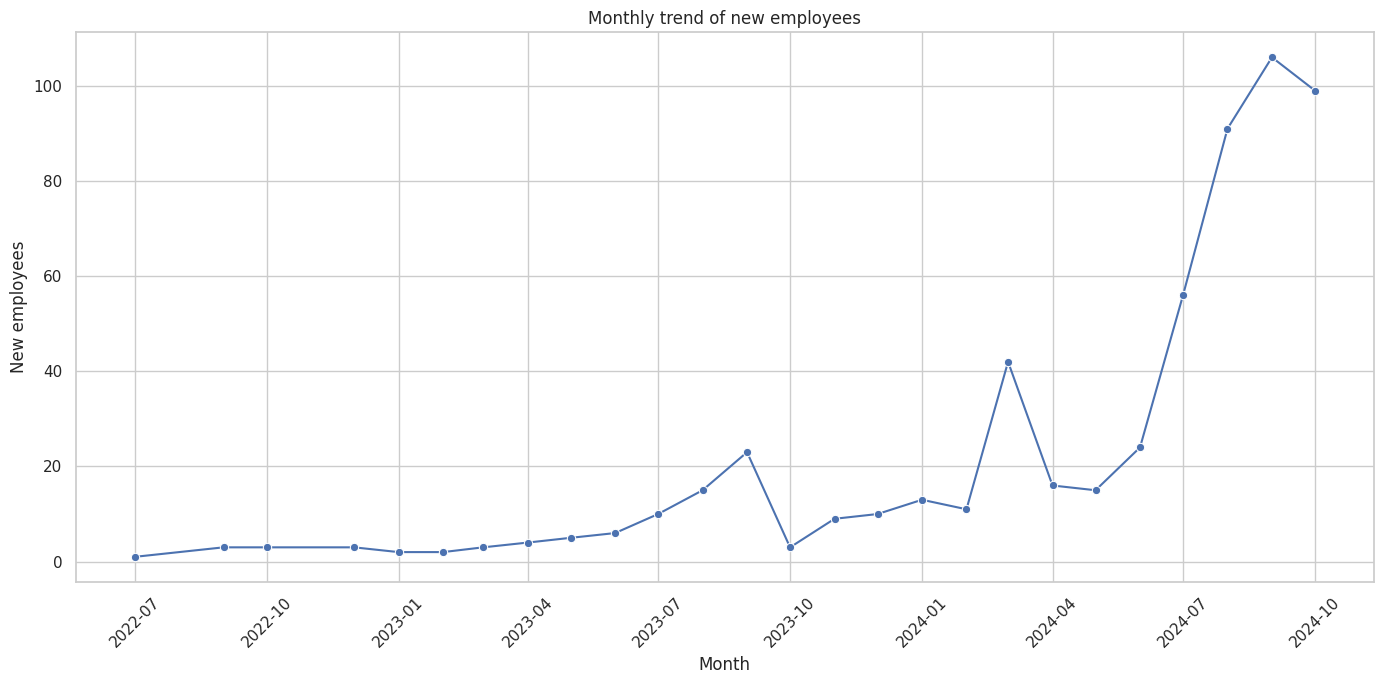

In [ ]:
# 2.1 Historical changes in total number of employees
human_capital['account created month'] = pd.to_datetime(human_capital['account created (utc)']).dt.to_period('M').dt.to_timestamp()
monthly_new_volunteers = human_capital.groupby('account created month').size().reset_index(name='New Volunteers')

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_new_employees, x='account created month', y='New Volunteers', marker='o')
plt.title('Monthly trend of new volunteers')
plt.xlabel('Month')
plt.ylabel('New volunteers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **2.1 Historical changes in the total number of volunteers**

##### **Chart Interpretation**

By analyzing the monthly increase trend in the total number of volunteers, between July 2022 and October 2024, the number of new volunteers fluctuated significantly.

- **Around September 2023**, the number of new volunteers reached a peak (about 20 people), and then declined.
- **From the beginning of 2024 to September**, the number of new volunteers increased rapidly again, indicating that the company may have undergone large-scale expansion during this period, with two peaks and continued to rise as high as (100 people).
- **In 2022 and early 2023**, the number of new volunteers will remain at a low level (less than 10 new volunteers per month), reflecting that the company's expansion at this stage is more cautious or is restricted by the external economic environment.

##### **In-depth analysis**

- **Reason for large-scale growth**: Rapid growth in the number of volunteers may be due to the expansion of the Rebecca programs scale, the launch of new products or the expansion of new programs. This expansion may be accompanied by the launch of new projects or the implementation of strategic transformations.Additionally, the graduation season would be a chance in volunteers increase.


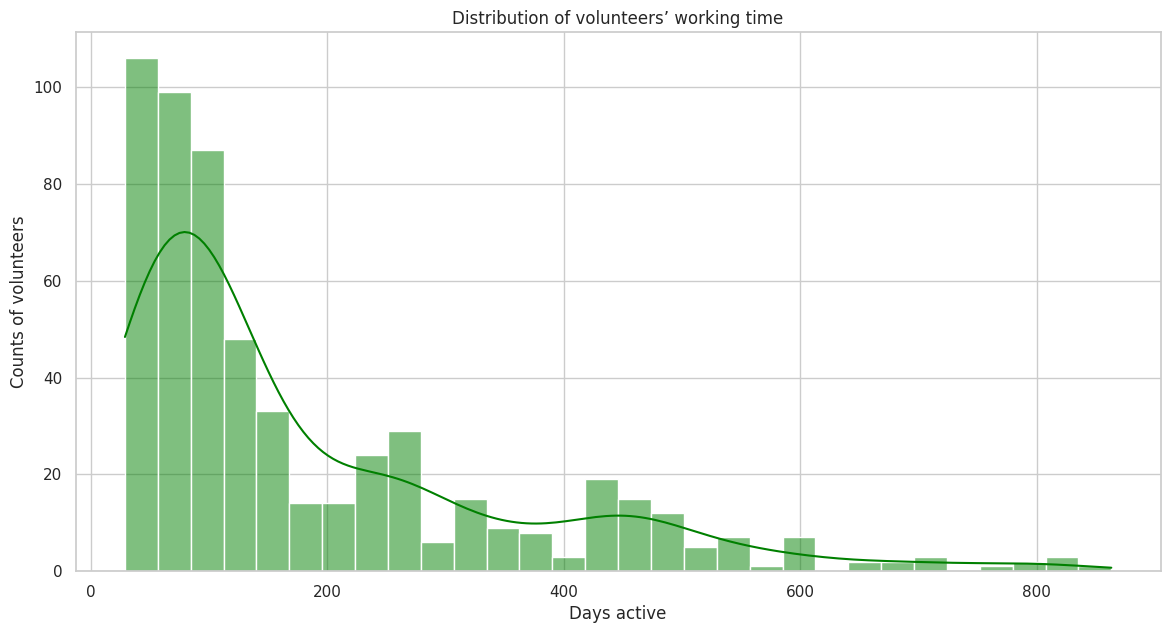

In [ ]:
# 2.2 Distribution of volunteers’ working time
plt.figure(figsize=(14, 7))
sns.histplot(human_capital['days active'], bins=30, kde=True, color='green')
plt.title('Distribution of volunteers’ working time')
plt.xlabel('Days active')
plt.ylabel('Counts of volunteers')
plt.show()

#### **2.2 Distribution of volunteers tenure**

##### **Chart interpretation**

By analyzing the distribution of volunteers tenure, we found that:

- **Most volunteers have a tenure of less than 200 days**, and the number of volunteers peaks at around 100 days (more than 100 people).

- **Volunteers who have been in office for more than 500 days** account for a very low proportion, indicating that the overall volunteers retention rate of the organization is low.

##### **In-depth analysis**

- **Short retention time**: Volunteers with a short tenure

- **Lack of core talents**

<ipython-input-16-36b87e384f45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=human_capital, y='role', order=human_capital['role'].value_counts().index, palette='viridis')


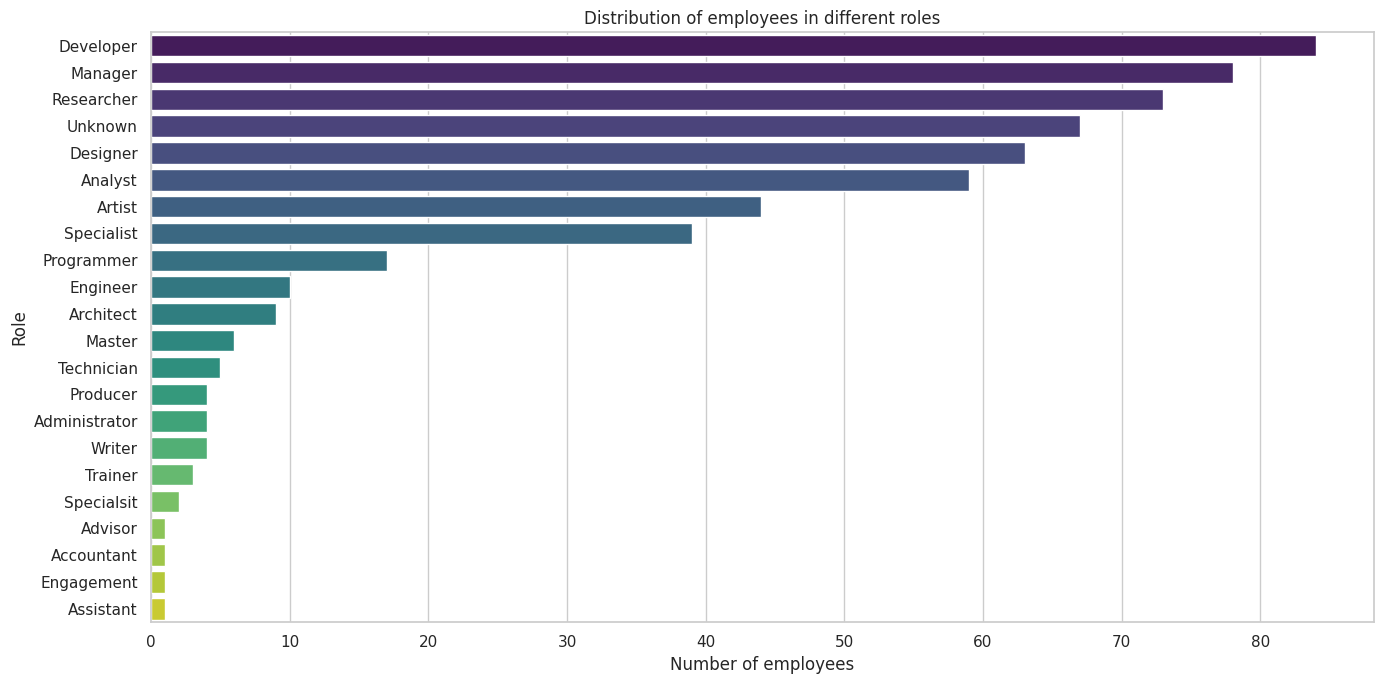

In [ ]:
# 2.3 Distribution of volunteers in different roles
plt.figure(figsize=(14, 7))
sns.countplot(data=human_capital, y='role', order=human_capital['role'].value_counts().index, palette='viridis')
plt.title('Distribution of employees in different roles')
plt.xlabel('Number of employees')
plt.ylabel('Role')
plt.tight_layout()
plt.show()

#### **2.3 Role and skill distribution**

##### **2.3.1 Distribution of volunteers in different roles**

By analyzing the distribution of volunteers in different roles, we found that:

- The number of volunteers in "Developer", "Manager", "Researcher" and "Designer" is the largest, with more than 60 people each.

- The number of volunteers in supporting positions such as "Assistant" and "Trainer" is relatively small (less than 5 people).

###### **In-depth analysis**

- **Core technical positions dominate**: Core technical positions dominate, reflecting the company's strategic positioning of technology-driven.

- **Insufficient supporting positions**: Insufficient number of supporting positions may lead to poor team collaboration, increase the non-core workload of core position employees, and affect overall efficiency.

<ipython-input-17-7723941c1b1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=human_capital, y='specialty1', order=human_capital['specialty1'].value_counts().index, palette='magma')


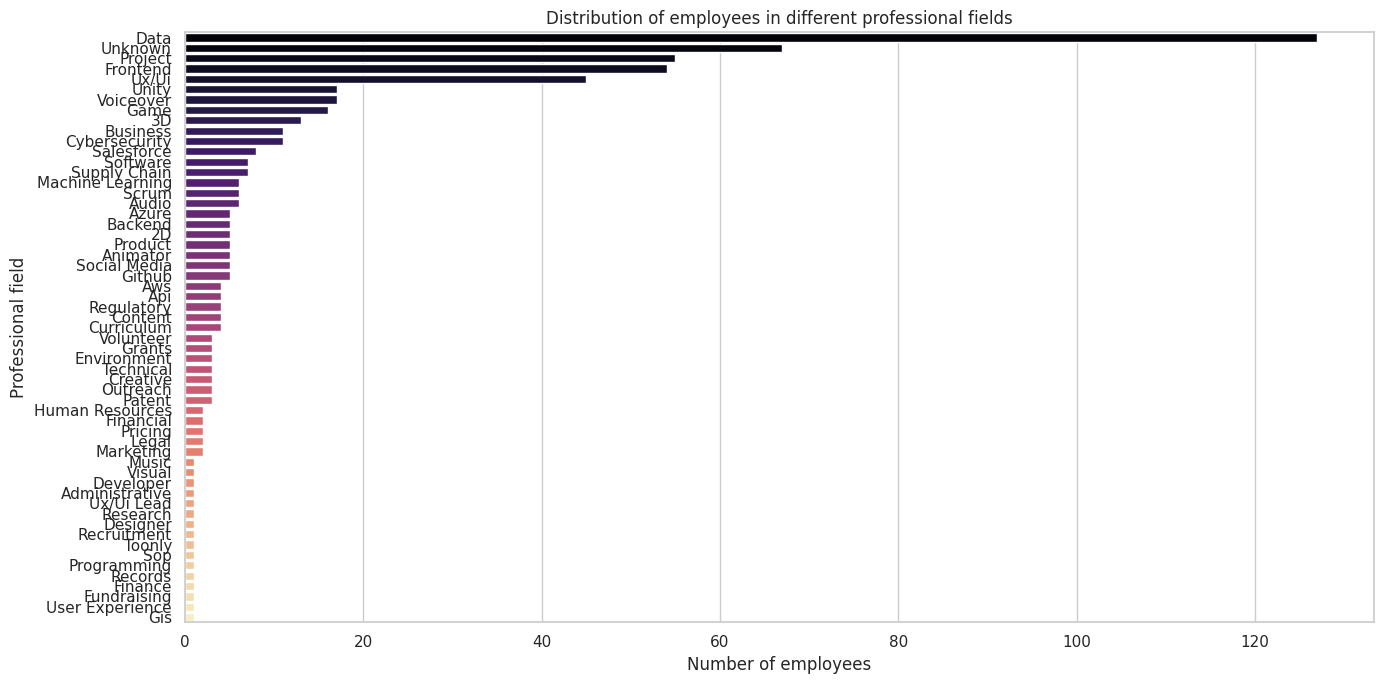

In [ ]:
# 2.3.2 Professional skillsets distribution of volunteers
plt.figure(figsize=(14, 7))
sns.countplot(data=human_capital, y='specialty1', order=human_capital['specialty1'].value_counts().index, palette='magma')
plt.title('Distribution of employees in different professional fields')
plt.xlabel('Number of employees')
plt.ylabel('Professional field')
plt.tight_layout()
plt.show()

#### **2.3 Role and skill distribution**
##### **2.3.2 distribution of volunteers different professional fields**

By analyzing the number distribution of volunteers in different professional fields, we found that:

- **The fields of "Data" and "Project"** have the largest number of volunteers, with more than 100 volunteers in each field.

- **The number of volunteers in long-tail fields (such as "Fundraising" or "GIS")** is very small.

3. Correlation Analysis

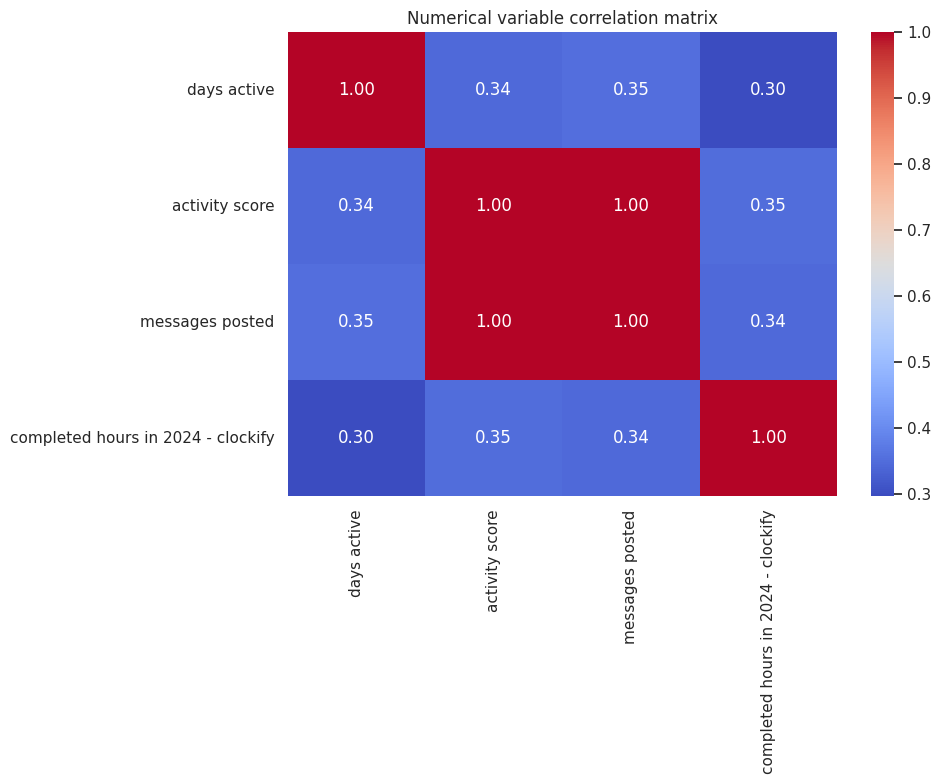

In [ ]:
## 3. Correlation Analysis
numerical_cols = ['days active', 'activity score', 'messages posted', 'completed hours in 2024 - clockify']
corr_matrix = human_capital[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical variable correlation matrix')
plt.tight_layout()
plt.show()

Through correlation matrix analysis, it was found that:

- **days active and activity score** have the highest correlation (0.34), indicating that the number of days a volunteer has been on the job significantly affects their activity score.
There is a moderate positive correlation (about 0.30) between
- **working hours and activity score**, There is a moderate positive correlation (about 0.30) between indicating that the impact of activity score on working hours is limited and may depend more on the nature of the position.

##### **In-depth analysis**

- **Activity and tenure**: Longer tenure improves volunteers’ activity scores, reflecting the accumulation of experience and increased identification with the company.
- **Activity and Working Hours**: The moderate correlation between activity scores and working hours indicates that activity has a certain impact on work engagement, but it is not the only factor. The nature of the job and task allocation also play a key role.

### **Data exploration analysis**:
1. **The total number of volunteers fluctuates significantly**, reflecting Rebecca's volunteers needs and volunteers' supplies at different stages and the impact of the external economic environment.
2. **The distribution of volunteers time shows that the retention rate is low**, and volunteers’ career development and retention strategies need to be strengthened.
3. **The distribution of roles and skills shows that core technical positions dominate**, and it is recommended to strengthen supporting positions and diversified skills training.
4. **Correlation analysis provides data support for future prediction model construction**, but more factors need to be combined to improve the accuracy of the model.

4. Trend Analysis and modeling

In [ ]:
# Trend Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

# the style of figures
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving human_capital_cleaned.csv to human_capital_cleaned (2).csv


In [ ]:
# insert cleaned data
human_capital = pd.read_csv('human_capital_cleaned.csv', parse_dates=['account created (utc)'])

In [ ]:
# confirm the key columns exist
required_columns = ['account created (utc)', 'days active', 'activity score', 'role', 'specialty1', 'name']
missing_required = [col for col in required_columns if col not in human_capital.columns]
if missing_required:
  print(f"\nmissing required columns: {missing_required}")
else:
  print("\nevery required columns exist")


every required columns exist


In [ ]:
# put'account created (utc)' as index，help for time series analysis
human_capital.set_index('account created (utc)', inplace=True)

# monthly sampling to calculate the monthly increasing volunteers
monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()

print("\nnull value count:")
print(monthly_new_volunteers.isnull().sum())


null value count:
new_volunteers    0
dtype: int64


<ipython-input-41-1025900b6172>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()


In [ ]:
# check data length
data_length = len(monthly_new_volunteers)
print(f"\ndata lenth: {data_length}")

# check the unique
print("\nunique values:")
print(monthly_new_volunteers['new_volunteers'].unique())


data lenth: 28

unique values:
[  1   0   3   2   4   5   6  10  15  23   9  13  11  42  16  24  56  91
 106  99]


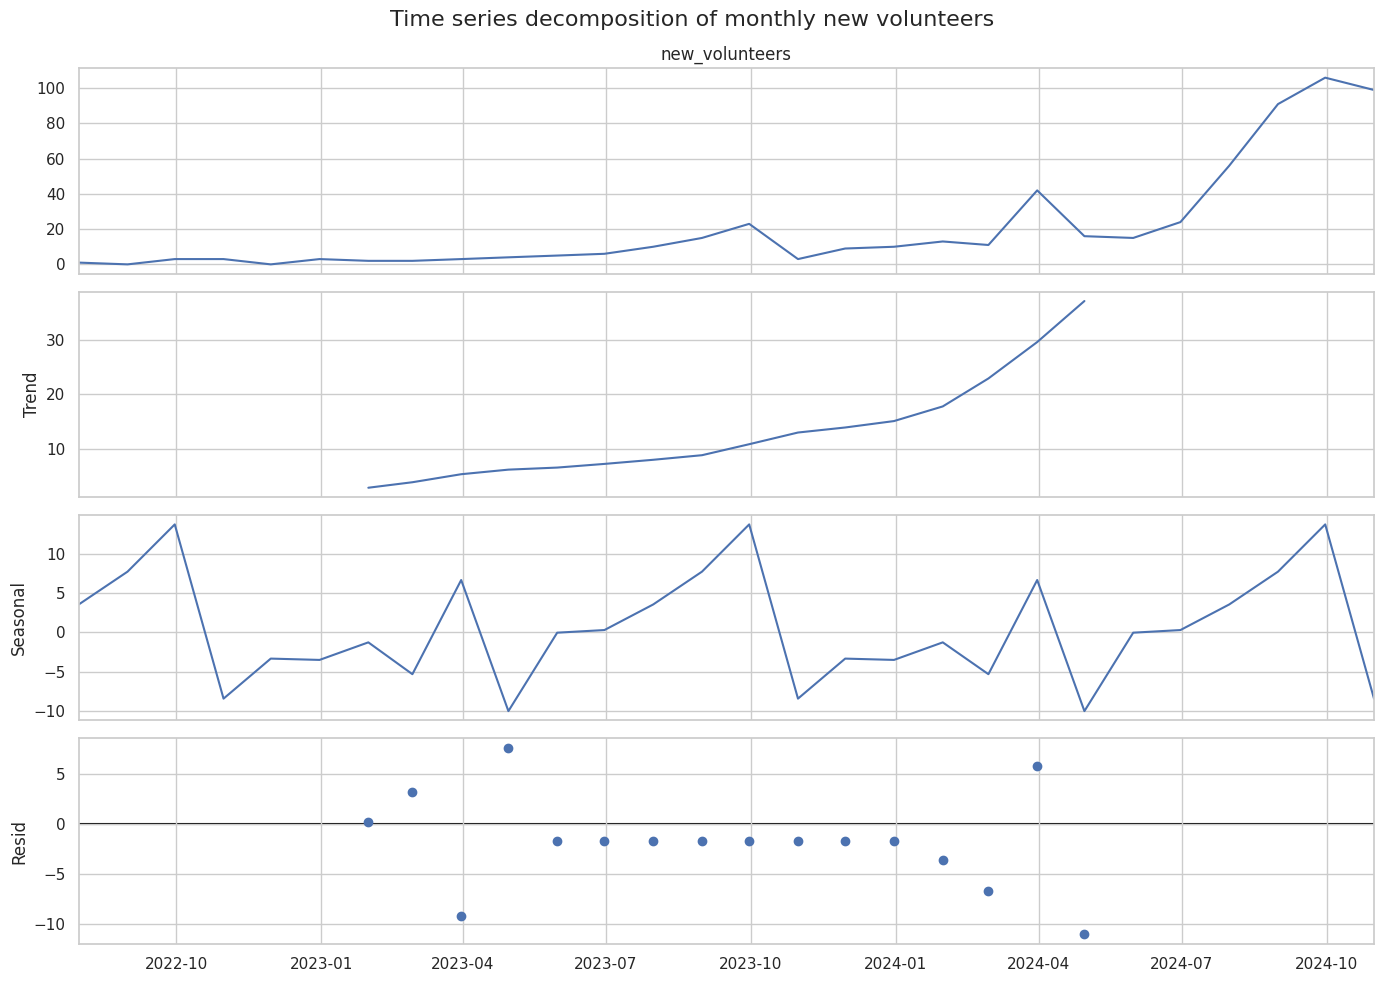

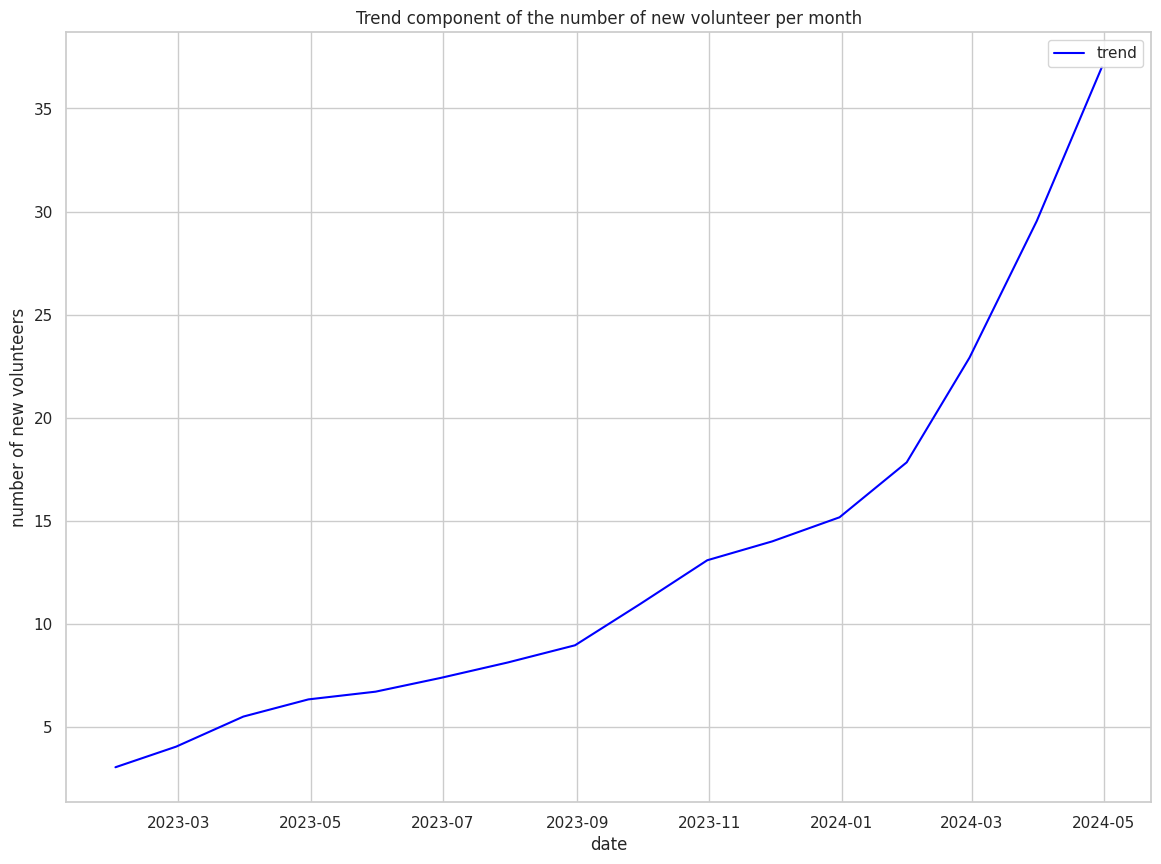

In [ ]:
## Trend analysis and time series decomposition
## time series
decomposition = seasonal_decompose(monthly_new_volunteers['new_volunteers'], model = 'additive', period = 12)

plt.rcParams.update({'figure.figsize': (14,10)})
decomposition.plot()
plt.suptitle('Time series decomposition of monthly new volunteers', fontsize = 16)
plt.tight_layout()
plt.show()

## trend analysis
plt.figure(figsize = (14,10))
plt.plot(decomposition.trend, label = 'trend', color = 'blue')
plt.title('Trend component of the number of new volunteer per month')
plt.xlabel('date')
plt.ylabel('number of new volunteers')
plt.legend()
plt.show()

### **4.1 Time series decomposition analysis**

Time series decomposition is an analytical method that decomposes raw data into trend components, seasonal components, and residual components. Its purpose is to provide a clear directional basis for subsequent modeling and help identify the main factors driving data changes.

#### **4.1.1 Trend component**
- **Analysis**:
- The trend line clearly shows the long-term growth trend of the number of new volunteers. In particular, starting from 2023, the number of new volunteers has steadily increased, and the growth rate has further accelerated in the middle and late 2024.
- This indicates that the RET(Rebecca Everelence Trust) is experiencing a period of scale expansion, which may be due to increased market demand or the expansion of internal business scale - the increased projects amount.

- The growth of trend components poses a challenge to corporate human resource planning. It is necessary to ensure sufficient resources to support this continued growth, including optimization of recruitment efficiency and team expansion capacity building.


#### **4.1.2 Seasonal component**
- **Analysis**:
- Seasonal component reveals the cyclical change pattern of the number of new volunteers. The data shows that the number of new volunteers each year shows significant seasonal characteristics:
- **Peak period**: such as March and November each year.
- **Trough period**: such as January and December each year.
- This periodicity may be related to the time of campus recruitment (such as spring recruitment and autumn recruitment).

- Enterprises can adjust their human resource strategies according to the peak and trough periods of recruitment. For example, during the peak period, increase the recruitment advertising budget and prepare training resources in advance; during the trough period, optimize the process and improve recruitment efficiency.

#### **4.1.3 Residual component**
- **Analysis**:
- The residual part represents random fluctuations that cannot be explained by trends or seasonality. Most of the residuals are close to zero, indicating that the model decomposition results are accurate.
- Months with significant fluctuations may reflect the impact of special events (such as policy adjustments, industry changes, or project launches) on the number of new volunteers.

- Further analysis of abnormal months is needed to find possible drivers of business background or external environment changes, and then evaluate whether exogenous variables need to be included in the model.

#### **Summary and next steps**
The results of time series decomposition provide a clear basis for subsequent forecasting models:
1. **Trend part**: It shows that volunteer growth will continue, and it may be necessary to predict the specific quantitative range of future growth.
2. **Seasonality part**: It confirms that the number of new volunteers has a significant cyclical law, which provides support for the adjustment of seasonal parameters in the forecasting model.

Based on this, we introduce the Prophet model for forecasting to further quantify the growth of new volunteers in the future.

In [ ]:
# 4.2 Time series Analysis (forecasting the volunteer needs in the folowing months)
# using Prophet Model
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set(style="whitegrid")

In [ ]:
human_capital = pd.read_csv('human_capital_cleaned.csv', parse_dates=['account created (utc)'])

In [ ]:
# put'account created (utc)' as index，help for time series analysis
human_capital.set_index('account created (utc)', inplace=True)

# monthly sampling to calculate the monthly increasing volunteers
monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()


<ipython-input-10-1d2f57082926>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()


In [ ]:
## using Facebook Prophet model
prophet_df = monthly_new_volunteers.reset_index().rename(columns={'account created (utc)':'ds', 'new_volunteers':'y'})

prophet_df['y'] = prophet_df['y'].fillna(method='ffill')

<ipython-input-11-c3e4fc87c1c1>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prophet_df['y'] = prophet_df['y'].fillna(method='ffill')


In [ ]:
# create the model
prophet_model = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality = False)
prophet_model.fit(prophet_df)


INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4hksajqd/kzqmigf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4hksajqd/_lx0evui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59624', 'data', 'file=/tmp/tmp4hksajqd/kzqmigf1.json', 'init=/tmp/tmp4hksajqd/_lx0evui.json', 'output', 'file=/tmp/tmp4hksajqd/prophet_model6q5d522p/prophet_model-20241220003342.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


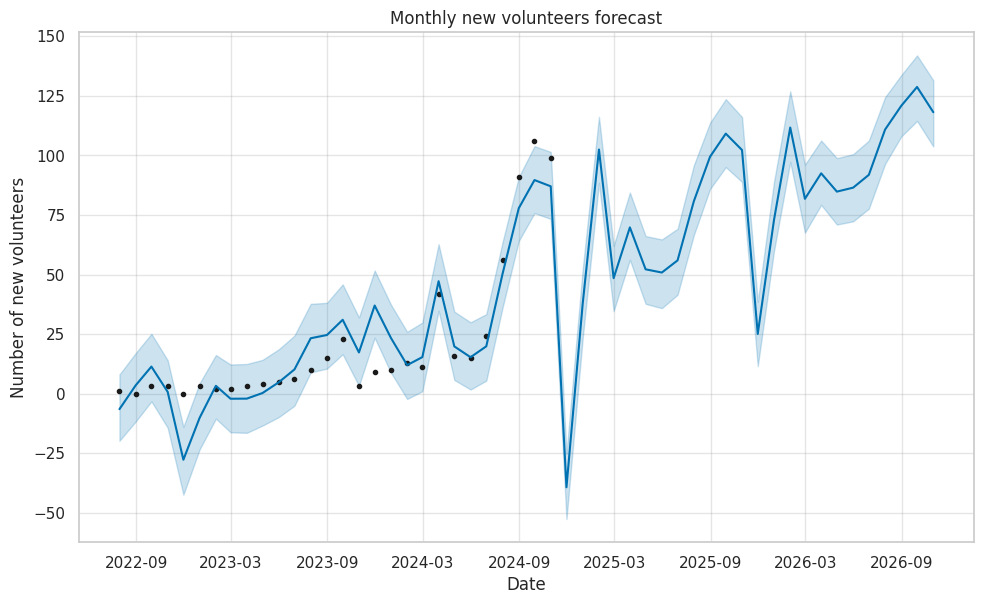

<function matplotlib.pyplot.show(close=None, block=None)>

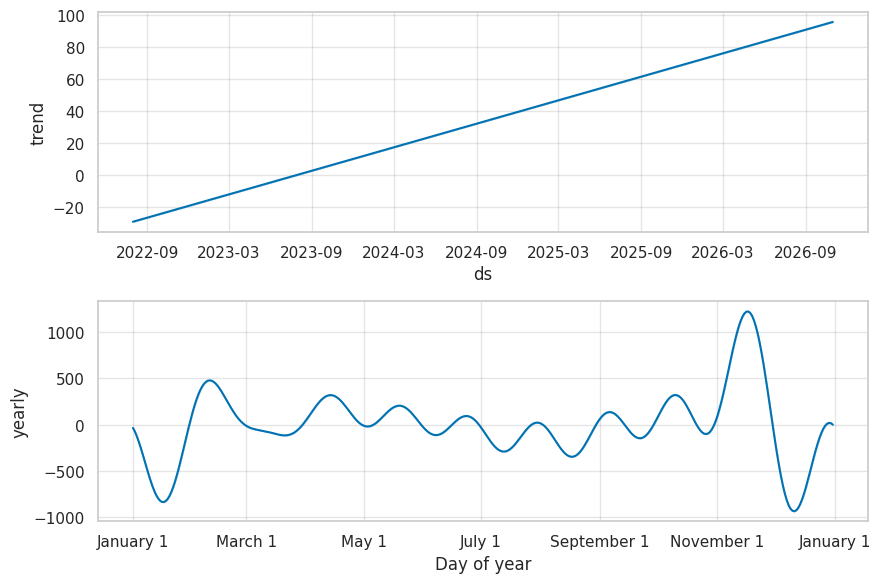

In [ ]:
future = prophet_model.make_future_dataframe(periods = 24, freq = 'M')
forecast = prophet_model.predict(future)

# visualize
fig1 = prophet_model.plot(forecast)
plt.title('Monthly new volunteers forecast')
plt.xlabel('Date')
plt.ylabel('Number of new volunteers')
plt.show()

fig2 = prophet_model.plot_components(forecast)
plt.show

### **4.2 Time series analysis using prophet model**
Base on previous analysis, using Facebook Prophet model to predict the number of new volunteers in the next 24 months to provide data support for the RET recruitment plan and resource allocation.

The Prophet model supports linear trend modeling and automatically captures annual seasonal patterns, making it ideal for new volunteers data that contains cyclical fluctuations.

"Monthly new volunteers forecast":
  - The blue line is the forecast for new headcount over the next 12 months, and the shaded area represents the range of uncertainty in the forecast.
  - Data shows that the number of new volunteers will continue to grow, and seasonal fluctuations will remain significant.

Component decomposition chart
1.Trend Component:
  - The trend of the number of new volunteers shows a steady linear growth, which is consistent with the results of time series decomposition.
  - This further supports the speculation that the company will maintain business expansion in the next year.
2.Seasonal Component:
  - Annual seasonal fluctuations clearly show the recruitment activity in each month in the future, such as the peaks at the beginning of the year (March) and the end of the year (November).

## In conclusion ##
1. **Trend Verification**:
 - Both the time series decomposition and the Prophet model show that the long-term trend of volunteers additions will continue to grow in the future, and seasonal fluctuations will significantly affect short-term changes.
 - RET needs to incorporate this growing trend into their long-term human resource strategic planning.
2. **Seasonal patterns**:
 - The number of new volunteers in the future will still be affected by the annual cyclical pattern. Companies need to take advantage of this pattern to optimize recruitment timing and resource allocation.
3. **Uncertainty risk**:
 - There are uncertainties in some months. It is recommended to monitor actual recruitment demand and market dynamics in advance in important months (such as January 2025).


5. Scenario Analysis

In [ ]:
# Begining work (每次重新开始)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set(style="whitegrid")

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet


from google.colab import files
uploaded = files.upload()

Saving human_capital_cleaned.csv to human_capital_cleaned.csv


In [ ]:
human_capital = pd.read_csv('human_capital_cleaned.csv', parse_dates=['account created (utc)'])

# put'account created (utc)' as index，help for time series analysis
human_capital.set_index('account created (utc)', inplace=True)

# monthly sampling to calculate the monthly increasing volunteers
monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()

<ipython-input-2-99ad9cf263bf>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()


In [ ]:
monthly_new_volunteers.head()

,new_volunteers
account created (utc),
2022-07-31,1
2022-08-31,0
2022-09-30,3
2022-10-31,3
2022-11-30,0


In [ ]:
# 5.1 Build a time series model of total volunteers
# calculate the total number of volunteers for each month
# Assumption: there is no quit date and all employees have been employed since joining
monthly_new_volunteers['total_volunteers'] = monthly_new_volunteers['new_volunteers'].cumsum()

# 准备数据给 Prophet
prophet_total_df = monthly_new_volunteers.reset_index().rename(columns={'account created (utc)': 'ds', 'total_volunteers': 'y'})

# 检查并处理缺失值（如果有）
prophet_total_df['y'] = prophet_total_df['y'].ffill()

# 建立 Prophet 模型
prophet_total_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_total_model.fit(prophet_total_df)

# 未来12个月的日期
future_total = prophet_total_model.make_future_dataframe(periods=12, freq='MS')  # 或 'ME'

# 预测
forecast_total = prophet_total_model.predict(future_total)


INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndaxo0mj/5n_m804p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndaxo0mj/2_cymq8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18144', 'data', 'file=/tmp/tmpndaxo0mj/5n_m804p.json', 'init=/tmp/tmpndaxo0mj/2_cymq8n.json', 'output', 'file=/tmp/tmpndaxo0mj/prophet_modeld_bfc98x/prophet_model-20250110224649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:46:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:46:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 5.2 introducing scenario analysis
# Define different growth and reduction scenarios
scenarios = {
    'conservative growth': {'type': 'growth', 'rate': 0.01, 'desc': 'The global economic recovery is slow, and companies are cautious in expanding'},
    'steady growth': {'type': 'growth', 'rate': 0.04, 'desc': 'New market demand increases, and the growth rate remains stable'},
    'optimistic growth': {'type': 'growth', 'rate': 0.10, 'desc': 'The technology industry is expanding rapidly, and the demand for recruitment is rising'},
    'slight reduction': {'type': 'reduction', 'rate': -0.01, 'desc': 'Some markets demand decline, and the total number of people is slowly declining'},
    'moderate reduction': {'type': 'reduction', 'rate': -0.03, 'desc': 'Inflation and interest rates rise, companies enter a contraction phase'},
    'severe reduction': {'type': 'reduction', 'rate': -0.08, 'desc': 'Major economic crisis or supply chain disruption leads to layoffs'},
    'risk scenario': {'type': 'risk', 'rate': -0.20, 'event_month': 6, 'desc': 'Major layoffs in the 6th month'}
}
# current total number of volunteers
current_total_volunteers = monthly_new_volunteers['total_volunteers'].iloc[-1]
print(f"\nCurrent total number of volunteers：{current_total_volunteers}")

# Date index for the next 12 months
future_dates = forecast_total['ds'].tail(12).reset_index(drop=True)

# Initialize scenario forecast results DataFrame
scenario_results = pd.DataFrame({'ds': future_dates})

# Assume: the monthly natural turned out rate is 0.01
monthly_turnover_rate = 0.01

# Predict for each scenario
for scenario_name, scenario_info in scenarios.items():
    rate = scenario_info['rate']
    scenario_type = scenario_info['type']
    description = scenario_info.get('description', '')
    # Initialize a list to store the total number of volunteers per month
    total_volunteers = []
    previous_total = current_total_volunteers

    for month in range(1, 13):
      if scenario_type == 'growth':
        new_total = previous_total * (1 + rate - monthly_turnover_rate)
      elif scenario_type == 'reduction':
            new_total = previous_total * (1 + rate - monthly_turnover_rate)
      elif scenario_type == 'risk':
        if month == scenario_info['event_month']:
          new_total = previous_total * (1 + rate)  # 一次性减少
        else:
            new_total = previous_total * (1 - monthly_turnover_rate)
      else:
            new_total = previous_total  # 默认不变
      # ensure that the total number of volunteers is not negative
      new_total = max(new_total, 0)

      # record results
      total_volunteers.append(new_total)
      previous_total = new_total  # 更新上一期的员工总数

    # Add the results to the scenario prediction result DataFrame
    scenario_results[scenario_name] = total_volunteers

# set 'ds' as index
scenario_results.set_index('ds', inplace=True)



Current total number of volunteers：575


Data is not continuous: Last historical point date 2024-10-31 00:00:00 and first forecast point date 2024-11-01 00:00:00


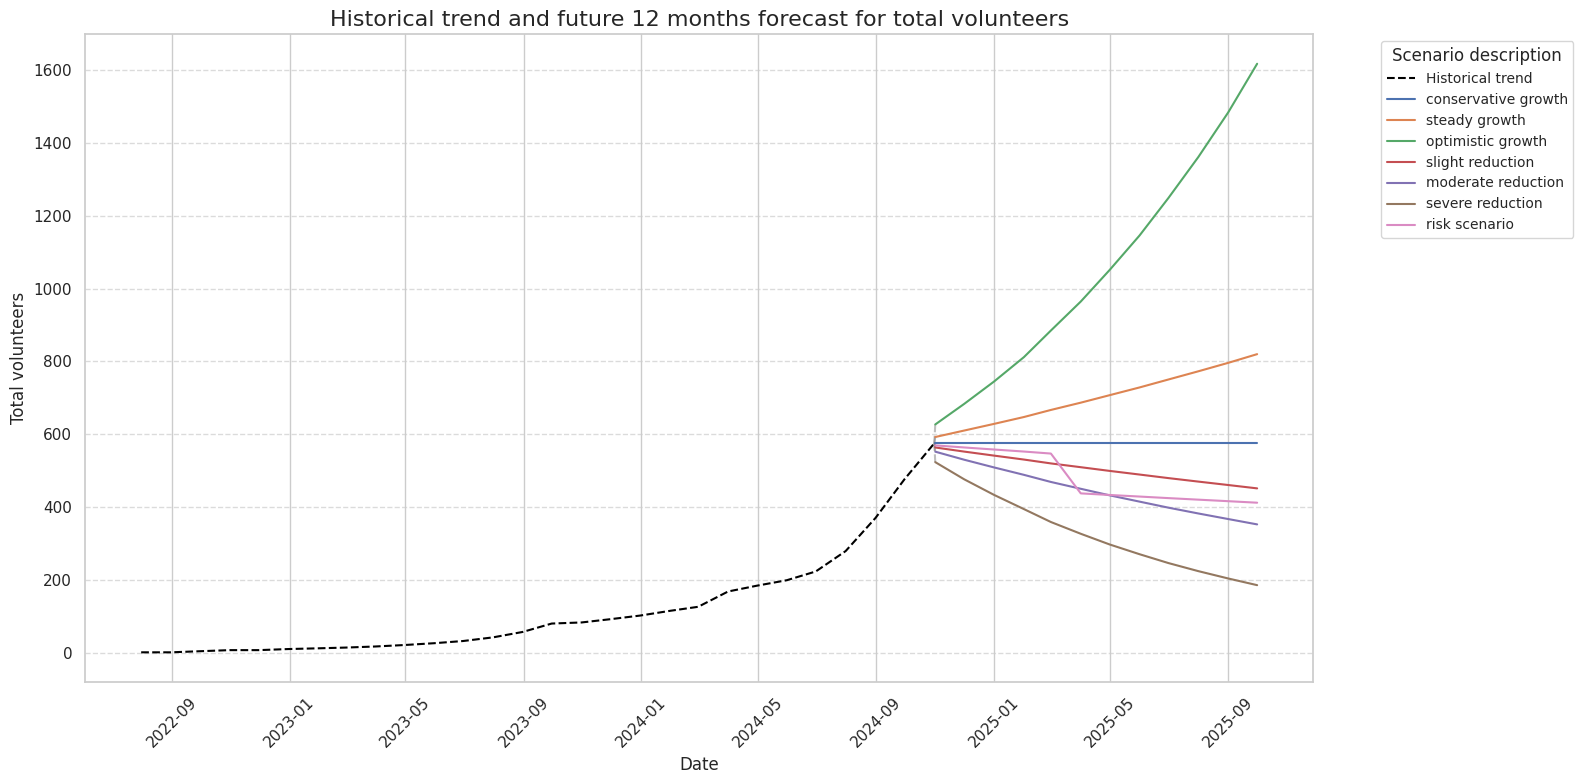

In [ ]:
# 5.3 visualization
# historical data
historical_data = prophet_total_df.copy()
historical_data.set_index('ds', inplace=True)

last_historical_point = historical_data.iloc[-1]
first_forecast_point = scenario_results.iloc[0]

# check if the connection is continuous
if last_historical_point.name != first_forecast_point.name:
    print(f"Data is not continuous: Last historical point date {last_historical_point.name} and first forecast point date {first_forecast_point.name}")

# plot
plt.figure(figsize=(16, 8))

# historical trend
plt.plot(historical_data.index, historical_data['y'], label='Historical trend', color='black', linestyle='--')

# the transition connection line(from the last point of historical data to the first point of forecast)
for scenario in scenarios.keys():
    plt.plot(
        [last_historical_point.name, first_forecast_point.name],
        [last_historical_point['y'], scenario_results[scenario].iloc[0]],
        color='gray',
        linestyle='--',
        alpha=0.5
    )

# plot each scenario forecast
for scenario in scenarios.keys():
    plt.plot(scenario_results.index, scenario_results[scenario], label=scenario)

# set title and label
plt.title('Historical trend and future 12 months forecast for total volunteers', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total volunteers', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Scenario description', fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# show the chart
plt.show()


In [ ]:
# 5.4 Analyze the results and interpret the scenarios

print("\nScenario Description：")
for scenario_name, scenario_info in scenarios.items():
    if scenario_info['type'] == 'growth':
        print(f"- {scenario_name}: {scenario_info['desc']}，monthly growth rate is {scenario_info['rate']*100:.2f}%")
    elif scenario_info['type'] == 'reduction':
        print(f"- {scenario_name}: {scenario_info['desc']}，monthly reduction rate is {abs(scenario_info['rate'])*100:.2f}%")
    elif scenario_info['type'] == 'risk':
        print(f"- {scenario_name}: {scenario_info['desc']}, reduce {abs(scenario_info['rate'])*100:.2f}% of employees in {scenario_info['event_month']} month")

# 显示结果表格
print("\nForecast of total number of volunteers in the next 12 months：")
display(scenario_results)


Scenario Description：
- conservative growth: The global economic recovery is slow, and companies are cautious in expanding，monthly growth rate is 1.00%
- steady growth: New market demand increases, and the growth rate remains stable，monthly growth rate is 4.00%
- optimistic growth: The technology industry is expanding rapidly, and the demand for recruitment is rising，monthly growth rate is 10.00%
- slight reduction: Some markets demand decline, and the total number of people is slowly declining，monthly reduction rate is 1.00%
- moderate reduction: Inflation and interest rates rise, companies enter a contraction phase，monthly reduction rate is 3.00%
- severe reduction: Major economic crisis or supply chain disruption leads to layoffs，monthly reduction rate is 8.00%
- risk scenario: Major layoffs in the 6th month, reduce 20.00% of employees in 6 month

Forecast of total number of volunteers in the next 12 months：


,conservative growth,steady growth,optimistic growth,slight reduction,moderate reduction,severe reduction,risk scenario
ds,,,,,,,
2024-11-01,575.0,592.250000,626.750000,563.500000,552.000000,523.250000,569.250000
2024-12-01,575.0,610.017500,683.157500,552.230000,529.920000,476.157500,563.557500
2025-01-01,575.0,628.318025,744.641675,541.185400,508.723200,433.303325,557.921925
2025-02-01,575.0,647.167566,811.659426,530.361692,488.374272,394.306026,552.342706
2025-03-01,575.0,666.582593,884.708774,519.754458,468.839301,358.818483,546.819279
2025-04-01,575.0,686.580071,964.332564,509.359369,450.085729,326.524820,437.455423
2025-05-01,575.0,707.177473,1051.122494,499.172182,432.082300,297.137586,433.080869
2025-06-01,575.0,728.392797,1145.723519,489.188738,414.799008,270.395203,428.750060
2025-07-01,575.0,750.244581,1248.838636,479.404963,398.207048,246.059635,424.462559


6. Skillset needs analysis

In [ ]:
# Begining work (每次重新开始)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set(style="whitegrid")

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

from google.colab import files
uploaded = files.upload()

Saving human_capital_cleaned.csv to human_capital_cleaned.csv


In [ ]:
human_capital = pd.read_csv('human_capital_cleaned.csv', parse_dates=['account created (utc)'])

# put'account created (utc)' as index，help for time series analysis
human_capital.set_index('account created (utc)', inplace=True)

# monthly sampling to calculate the monthly increasing volunteers
monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()

<ipython-input-2-99ad9cf263bf>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()


In [ ]:
# 6.1 Assess current skillsets
# count the number and proportion of volunteers in each specialty field
specialty_counts = human_capital['specialty1'].value_counts()
specialty_proportions = specialty_counts/specialty_counts.sum()

print('\nNumber of volunteers in each specialty field：')
print(specialty_counts)
print('\nProportion of volunteers in each specialty field：')
print(specialty_proportions)

# Identify key capabilities/skillset
# assume that based on corporate strategy, the follwing specialty fields are considered core capabilities
core_specialties = ['Data', 'Project', 'Frontend','Ux/Ui']
# comfirm that these specialty fields exist in the data
core_specialties = [specialty for specialty in core_specialties if specialty in specialty_counts.index]
print(f"\nKey capability areas(core specialty areas):{core_specialties}")


Number of volunteers in each specialty field：
specialty1
Data                127
Unknown              67
Project              55
Frontend             54
Ux/Ui                45
Unity                17
Voiceover            17
Game                 16
3D                   13
Business             11
Cybersecurity        11
Salesforce            8
Software              7
Supply Chain          7
Machine Learning      6
Scrum                 6
Audio                 6
Azure                 5
Backend               5
2D                    5
Product               5
Animator              5
Social Media          5
Github                5
Aws                   4
Api                   4
Regulatory            4
Content               4
Curriculum            4
Volunteer             3
Grants                3
Environment           3
Technical             3
Creative              3
Outreach              3
Patent                3
Human Resources       2
Financial             2
Pricing               2
Legal 

In [ ]:
# 6.2 Analyze capacity gap
# calculate the numver and proportion of employees in the current core competency area
current_core_counts = specialty_counts[core_specialties]
current_core_proportions = current_core_counts/current_core_counts.sum()

print("\nThe current number of volunteers in the core competecy area:")
print(current_core_counts)

print("\nThe current proportion of core competency areas:")
print(current_core_proportions)

# Assume that the future strategic goal is to increase the proportion of core competency area
# for example
desired_core_proportions = {
    'Data': 0.15,
    'Project':0.10,
    'Frontend': 0.05,
    'Ux/Ui': 0.07
}

# Calculate capacity gap
# Forecast the total number of volunteers using the most optimistic scenario
max_future_volunteers = scenario_results.max().max()

desired_core_counts = {spec: desired_core_proportions[spec] * max_future_volunteers for spec in core_specialties}
current_core_counts_dict = current_core_counts.to_dict()
capability_gaps = {spec: desired_core_counts[spec] - current_core_counts_dict.get(spec, 0) for spec in core_specialties}

print("\nCapacity gap(future demand - current quantity):")
print(capability_gaps)


The current number of volunteers in the core competecy area:
specialty1
Data        127
Project      55
Frontend     54
Ux/Ui        45
Name: count, dtype: int64

The current proportion of core competency areas:
specialty1
Data        0.451957
Project     0.195730
Frontend    0.192171
Ux/Ui       0.160142
Name: count, dtype: float64

Capacity gap(future demand - current quantity):
{'Data': 115.5923374287749, 'Project': 106.7282249525166, 'Frontend': 26.8641124762583, 'Ux/Ui': 68.20975746676163}


In [ ]:
#6.3 Forecasting key competency requirements
# the desired proportions of all core expertise areas to ensure that all core expertise areas are covered
# if there are new core expertise areas, add them to desired_core_proportions
desired_core_proportions = {
    'Data': 0.15,
    'Project': 0.10,
    'Frontend': 0.05,
    'Ux/Ui': 0.07
}

# Create a new DataFrame to store the talent demand for core competency areas
# Each scenario and each core expertise area will have a separate column

core_demand_forecast = pd.DataFrame(index=scenario_results.index)

for scenario in scenario_results.keys():
  for spec in core_specialties:
    column_name = f"{scenario}_{spec}"
    proportion = desired_core_proportions.get(spec, 0)
    core_demand_forecast[column_name] = scenario_results[scenario] * proportion

# Round to the nearest integer
core_demand_forecast = core_demand_forecast.round().astype(int)

print("\nTalent demand in core competency areas for each scenario in the next 12 months (partial data):")
display(core_demand_forecast)


Talent demand in core competency areas for each scenario in the next 12 months (partial data):


,conservative growth_Data,conservative growth_Project,conservative growth_Frontend,conservative growth_Ux/Ui,steady growth_Data,steady growth_Project,steady growth_Frontend,steady growth_Ux/Ui,optimistic growth_Data,optimistic growth_Project,...,moderate reduction_Frontend,moderate reduction_Ux/Ui,severe reduction_Data,severe reduction_Project,severe reduction_Frontend,severe reduction_Ux/Ui,risk scenario_Data,risk scenario_Project,risk scenario_Frontend,risk scenario_Ux/Ui
ds,,,,,,,,,,,,,,,,,,,,,
2024-11-01,86,58,29,40,89,59,30,41,94,63,...,28,39,78,52,26,37,85,57,28,40
2024-12-01,86,58,29,40,92,61,31,43,102,68,...,26,37,71,48,24,33,85,56,28,39
2025-01-01,86,58,29,40,94,63,31,44,112,74,...,25,36,65,43,22,30,84,56,28,39
2025-02-01,86,58,29,40,97,65,32,45,122,81,...,24,34,59,39,20,28,83,55,28,39
2025-03-01,86,58,29,40,100,67,33,47,133,88,...,23,33,54,36,18,25,82,55,27,38


In [ ]:
print("\nTalent demand in core competency areas for each scenario in the next 12 months (partial data):")
display(core_demand_forecast)


Talent demand in core competency areas for each scenario in the next 12 months (partial data):


,conservative growth_Data,conservative growth_Project,conservative growth_Frontend,conservative growth_Ux/Ui,steady growth_Data,steady growth_Project,steady growth_Frontend,steady growth_Ux/Ui,optimistic growth_Data,optimistic growth_Project,...,moderate reduction_Frontend,moderate reduction_Ux/Ui,severe reduction_Data,severe reduction_Project,severe reduction_Frontend,severe reduction_Ux/Ui,risk scenario_Data,risk scenario_Project,risk scenario_Frontend,risk scenario_Ux/Ui
ds,,,,,,,,,,,,,,,,,,,,,
2024-11-01,86,58,29,40,89,59,30,41,94,63,...,28,39,78,52,26,37,85,57,28,40
2024-12-01,86,58,29,40,92,61,31,43,102,68,...,26,37,71,48,24,33,85,56,28,39
2025-01-01,86,58,29,40,94,63,31,44,112,74,...,25,36,65,43,22,30,84,56,28,39
2025-02-01,86,58,29,40,97,65,32,45,122,81,...,24,34,59,39,20,28,83,55,28,39
2025-03-01,86,58,29,40,100,67,33,47,133,88,...,23,33,54,36,18,25,82,55,27,38
2025-04-01,86,58,29,40,103,69,34,48,145,96,...,23,32,49,33,16,23,66,44,22,31
2025-05-01,86,58,29,40,106,71,35,50,158,105,...,22,30,45,30,15,21,65,43,22,30
2025-06-01,86,58,29,40,109,73,36,51,172,115,...,21,29,41,27,14,19,64,43,21,30
2025-07-01,86,58,29,40,113,75,38,53,187,125,...,20,28,37,25,12,17,64,42,21,30


from matplotlib import pyplot as plt
_df_0['steady growth_Data'].plot(kind='hist', bins=20, title='steady growth_Data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['steady growth_Project'].plot(kind='hist', bins=20, title='steady growth_Project')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['steady growth_Frontend'].plot(kind='hist', bins=20, title='steady growth_Frontend')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['steady growth_Ux/Ui'].plot(kind='hist', bins=20, title='steady growth_Ux/Ui')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='steady growth_Data', y='steady growth_Project', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='steady growth_Project', y='steady growth_Frontend', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='steady growth_Frontend', y='steady growth_Ux/Ui', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='steady growth_Ux/Ui', y='optimistic growth_Data', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['slight reduction_Data']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('slight reduction_Data')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['slight reduction_Project']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('slight reduction_Project')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['slight reduction_Frontend']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('slight reduction_Frontend')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['slight reduction_Ux/Ui']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('slight reduction_Ux/Ui')

from matplotlib import pyplot as plt
_df_12['steady growth_Data'].plot(kind='line', figsize=(8, 4), title='steady growth_Data')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['steady growth_Project'].plot(kind='line', figsize=(8, 4), title='steady growth_Project')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['steady growth_Frontend'].plot(kind='line', figsize=(8, 4), title='steady growth_Frontend')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['steady growth_Ux/Ui'].plot(kind='line', figsize=(8, 4), title='steady growth_Ux/Ui')
plt.gca().spines[['top', 'right']].set_visible(False)

7. Regression analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

file_path = 'human_capital_cleaned.csv'
data = pd.read_csv(file_path, parse_dates=['account created (utc)'])

In [ ]:
# select the target variable and related features for regression analysis
target = 'completed hours in 2024 - clockify'
features = ['days active on slack', 'messages posted', 'days active', 'activity score']

# Filter the relevant columns and remove rows with missing values ​​in the target variable
data = data[features + [target]].dropna(subset=[target])

# fill missing values in features with mean
data.fillna(data.mean(), inplace = True)

# separate feature(x) and target variable(y)
x = data[features]
y = data[target]

# standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# split the dataset into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# initialize the random foreset regressor model
rf_model = RandomForestRegressor(random_state=42)

# set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid search using cross validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# get the best model for grid search
best_rf_model = grid_search.best_estimator_

# make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# evaluate the optimized model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error:", mse_rf)
print("R^2 Score:", r2_rf)
print("Best Parameters:", grid_search.best_params_)



Mean Squared Error: 9673.111705702768
R^2 Score: 0.6692993289607527
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


**Mean Squared Error (MSE)**:
- **MSE** is **9673.11**, which represents the average of the squared errors between the predicted and actual values. The unit is "squared hours completed".In real-world scenarios, this error means that the model may have some deviations in its predictions for some samples (especially high-value samples).
- In human resources or performance forecasting, this error may be caused by the diversity of volunteers' work types or the unpredictability of special tasks. For example, some volunteers' tasks may contain unquantifiable complexity, and the model currently does not capture these influencing factors.

**R² Score**:
- **R²** is **0.669**, indicating that the model explains **66.9%** of the variation in the target variable. This shows that the model has successfully captured the main influencing factors, but there is still about **33.1%** of the variation that is not explained.
- In reality, this unexplained part may come from the following points:
- There are variables that are not included in the data, such as task difficulty, employee skill level, teamwork effect, etc.
- The interaction effects between current features (such as the combined effect of "active days" and "activity score") are not fully modeled.
- Random errors (noise) and external uncontrollable factors, such as unexpected personal affairs or other external environmental influences.

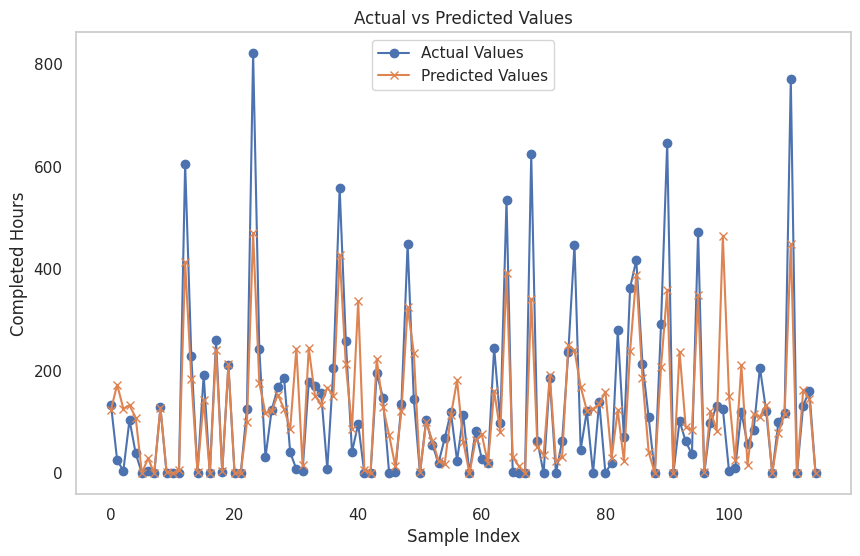

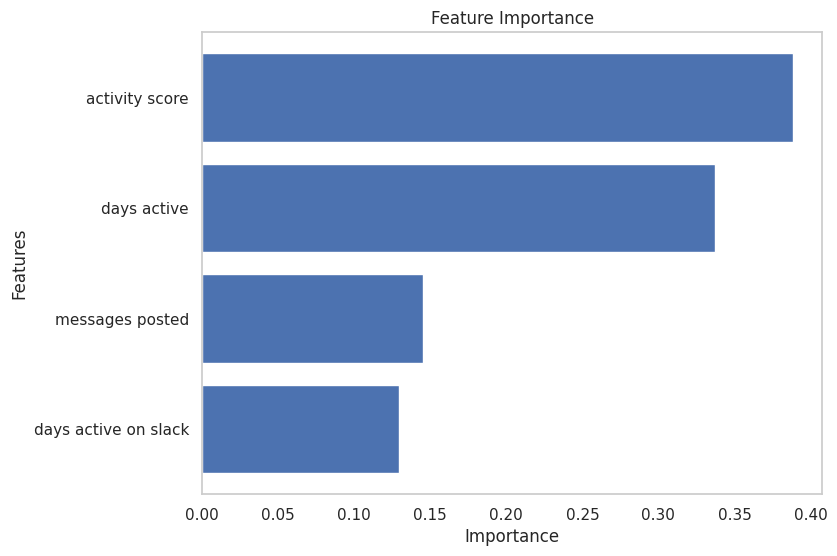

In [ ]:
# Convert to actual values
y_test_actual = y_test
y_pred_actual = y_pred_rf
# Line graph of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual Values', marker='o')
plt.plot(range(len(y_pred_actual)), y_pred_actual, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Completed Hours')
plt.legend()
plt.grid()
plt.show()

# Feature Importance Graph
feature_importances = best_rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid()
plt.show()

**Main trends**:
- The **blue line** (actual value) and the **orange line** (predicted value) have consistent overall trends, especially in the low-value (lower working hours) area, the prediction is more accurate.
- The high-value area has large fluctuations, indicating that the model has difficulty predicting the completion of extreme working hours. It may be that high-value samples have more complex influencing factors (such as overtime, sudden projects, etc.), which are not fully captured by the current features.

**Theoretical support**:
- In reality, volunteers' completed working hours (especially high working hours) may be affected by:
- **Long-term activity** (`days active` and `activity score`): Higher activity may reflect higher work engagement.
- **Individual characteristics** (such as professional skill level): These traits not captured by the model may determine the ability of volunteers to complete work efficiently in a short period of time.
- **External environmental factors**: Such as task urgency or additional incentive mechanisms, these data are often difficult to quantify or not included in the model.

**Improvement suggestions**:
- Add features related to task complexity or sudden tasks in high-value samples.
- Model high-value samples separately (e.g., via piecewise regression) to better account for variations in high-value areas.

In [ ]:
# insert basic package and data for renew 每次重新开始需要录入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set(style="whitegrid")

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet


from google.colab import files
uploaded = files.upload()

human_capital = pd.read_csv('human_capital_cleaned.csv', parse_dates=['account created (utc)'])

# put'account created (utc)' as index，help for time series analysis
human_capital.set_index('account created (utc)', inplace=True)

# monthly sampling to calculate the monthly increasing volunteers
monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()



重新开始：

In [ ]:
# Begining work (每次重新开始)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# visualization style
sns.set(style="whitegrid")

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet


from google.colab import files
uploaded = files.upload()

In [ ]:
human_capital = pd.read_csv('human_capital_cleaned.csv', parse_dates=['account created (utc)'])

# put'account created (utc)' as index，help for time series analysis
human_capital.set_index('account created (utc)', inplace=True)

# monthly sampling to calculate the monthly increasing volunteers
monthly_new_volunteers = human_capital.resample('M').size().rename('new_volunteers').to_frame()

In [ ]:
# 识别了企业的核心能力领域（Data、Project、Frontend、Ux/Ui），分析了这些领域的当前员工数量和未来需求预测，确定了能力缺口。基于能力缺口，制定了详细的招聘和培训计划，确保企业能够在未来保持或提升关键能力领域的人才储备，以支持战略目标的实现。

In [ ]:
# Regression analysis
#已实现回归分析，评估了业务因素（如活跃天数、活动评分等）对员工需求的影响

In [ ]:
#通过能力缺口分析和招聘需求预测，评估了不同核心能力领域的人才供需情况。尽管供需分析主要集中在员工总数层面，但已经部分覆盖了劳动力供需平衡。进一步细化供需分析到具体技能层面将有助于更精准地满足各专业领域的劳动力需求